In [175]:
# Import of libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [176]:
from sklearn.preprocessing import StandardScaler

In [177]:
# Load the data
df = pd.read_csv("../data/BankChurners_CleanedMapped.csv", index_col="ClientID")
df.head()

,Attrited,Age,Gender,DependentCount,EducationLevel,MaritalStatus,IncomeCategory,CardCategory,RelationshipPeriod_InMonths,TotalProductNo,MonthsInactive_Last12Months,ContactNo_Last12Months,CreditLimit,TotalRevolvingBalance_CC,OpenToBuyAve_Last12Months,TransactionAmount_ChangeQ4overQ1,TotalTransactionAmount_Last12Months,TotalTransactionCount_Last12Months,TransactionCount_ChangeQ4overQ1,AveCardUtilizationRatio
ClientID,,,,,,,,,,,,,,,,,,,,
768805383,0,45,0,3,2,2,3,1,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
818770008,0,49,1,5,4,1,1,1,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
713982108,0,51,0,3,4,2,4,1,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
769911858,0,40,1,4,2,0,1,1,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
709106358,0,40,0,3,1,2,3,1,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [178]:
df_target = df[["Attrited"]]
df_target.head()

,Attrited
ClientID,
768805383,0
818770008,0
713982108,0
769911858,0
709106358,0


In [179]:
df_data = df.drop(["Attrited"], axis=1)
display(df_data.head())

,Age,Gender,DependentCount,EducationLevel,MaritalStatus,IncomeCategory,CardCategory,RelationshipPeriod_InMonths,TotalProductNo,MonthsInactive_Last12Months,ContactNo_Last12Months,CreditLimit,TotalRevolvingBalance_CC,OpenToBuyAve_Last12Months,TransactionAmount_ChangeQ4overQ1,TotalTransactionAmount_Last12Months,TotalTransactionCount_Last12Months,TransactionCount_ChangeQ4overQ1,AveCardUtilizationRatio
ClientID,,,,,,,,,,,,,,,,,,,
768805383,45,0,3,2,2,3,1,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
818770008,49,1,5,4,1,1,1,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
713982108,51,0,3,4,2,4,1,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
769911858,40,1,4,2,0,1,1,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
709106358,40,0,3,1,2,3,1,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [180]:
# Normalize data
df_data_norm = (df_data-df_data.mean())/df_data.std()
display(df_data_norm.head())

,Age,Gender,DependentCount,EducationLevel,MaritalStatus,IncomeCategory,CardCategory,RelationshipPeriod_InMonths,TotalProductNo,MonthsInactive_Last12Months,ContactNo_Last12Months,CreditLimit,TotalRevolvingBalance_CC,OpenToBuyAve_Last12Months,TransactionAmount_ChangeQ4overQ1,TotalTransactionAmount_Last12Months,TotalTransactionCount_Last12Months,TransactionCount_ChangeQ4overQ1,AveCardUtilizationRatio
ClientID,,,,,,,,,,,,,,,,,,,
768805383,-0.165397,-1.059903,0.503343,-0.354005,0.628097,0.620008,-0.250574,0.384602,0.763905,-1.327071,0.492379,0.446600,-0.473399,0.488947,2.623365,-0.959659,-0.973847,3.833813,-0.775844
818770008,0.333554,0.943389,2.043098,0.822178,-0.727270,-0.736256,-0.250574,1.010665,1.407237,-1.327071,-0.411596,-0.041365,-0.366649,-0.008486,3.563117,-0.916387,-1.357273,12.607950,-0.616245
713982108,0.583030,-1.059903,0.503343,0.822178,0.628097,1.298140,-0.250574,0.008964,0.120573,-1.327071,-2.219546,-0.573669,-1.426788,-0.445636,8.366801,-0.740945,-1.911111,6.807528,-0.997106
769911858,-0.789087,0.943389,1.273221,-0.354005,-2.082636,-0.736256,-0.250574,-0.241461,-0.522759,1.641397,-1.315571,-0.585222,1.661604,-0.734063,2.942698,-0.951711,-1.911111,6.807528,1.759599
709106358,-0.789087,-1.059903,0.503343,-0.942096,0.628097,0.620008,-0.250574,-1.869225,0.763905,-1.327071,-2.219546,-0.430856,-1.426788,-0.302853,6.455363,-1.056211,-1.570288,7.508954,-0.997106


In [181]:
from sklearn.cluster import KMeans

# number of clusters
num_clusters = 4

# fit a kmeans object to the dataset
kmeans = KMeans(n_clusters=num_clusters, init='k-means++', n_init=1).fit(df_data_norm)

# clusters is an attribute of the object
cluster_centers = kmeans.cluster_centers_

# add cluster index to dataframe
df_cluster_labels = pd.DataFrame(
        list(zip(list(df_data_norm.index), kmeans.labels_)), 
        columns=["ClientID", "ClusterLabel"]
    ).set_index("ClientID")
df_cluster_labels.head()

#df_data_norm_plus_cluster = df_data_norm.join(df_cluster_labels, on="ClientID")
#display(df_data_norm_plus_cluster.head())

,ClusterLabel
ClientID,
768805383,1
818770008,3
713982108,3
769911858,3
709106358,3


In [182]:
df_target_cluster = df_target.merge(df_cluster_labels, on="ClientID")
df_target_cluster["Status"] = df_target_cluster["Attrited"].replace([0, 1], ["Cust", "Attr"]) + "/" + \
    df_target_cluster["ClusterLabel"].replace([0, 1, 2, 3], ["C0", "C1", "C2", "C3"])
df_target_cluster.head(10)

,Attrited,ClusterLabel,Status
ClientID,,,
768805383,0,1,Cust/C1
818770008,0,3,Cust/C3
713982108,0,3,Cust/C3
769911858,0,3,Cust/C3
709106358,0,3,Cust/C3
713061558,0,3,Cust/C3
810347208,0,1,Cust/C1
818906208,0,1,Cust/C1
710930508,0,1,Cust/C1


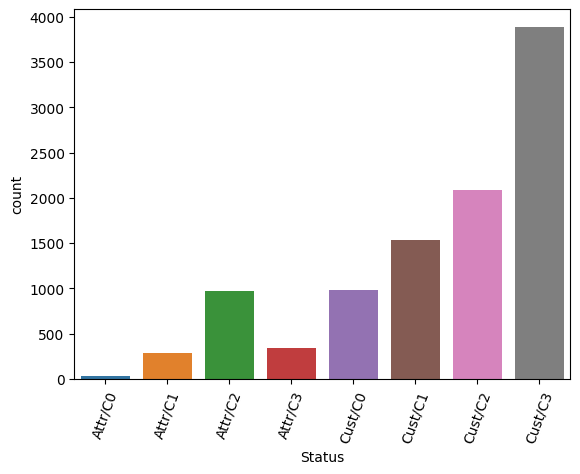

In [183]:
labels = sorted(list(df_target_cluster["Status"].unique()))
sns.countplot(
    x=df_target_cluster["Status"],
    order=labels
)
plt.xticks(rotation = 70)
plt.show()
